# import libraries and load CSV file of part 1

In [3]:
import pandas as pd
import numpy as np

#Load the dataset
df = pd.read_csv('data/initial.csv')

#Convert 'Date' to datetime objects (Crucial for time analysis!)
df['Date'] = pd.to_datetime(df['Date'])

#Rename 'Date' to 'Month' to match your instructions
df = df.rename(columns={'Date': 'Month'})

#check data by displaying first 5 rows with df.head
df.head()

,Month,Product_A,Product_B,Product_C,Product_D
0,2025-01-01,71,66,39,45
1,2025-02-01,55,79,46,10
2,2025-03-01,65,62,39,11
3,2025-04-01,100,57,33,16
4,2025-05-01,70,57,59,36


# calculate metrics

In [4]:
products = ['Product_A', 'Product_B', 'Product_C', 'Product_D']

# total Sales: SUM of all products for that month
df['Total_Sales'] = df[products].sum(axis=1)

# average Sales: MEAN of the 4 products
df['Average_Sales'] = df[products].mean(axis=1)

# month-over-Month Growth: Percentage change from previous row
# pct_change() automatically compares current row vs previous row
df['Month_over_Month_Growth'] = df['Total_Sales'].pct_change() * 100

# Display the new columns to check
df.head()

,Month,Product_A,Product_B,Product_C,Product_D,Total_Sales,Average_Sales,Month_over_Month_Growth
0,2025-01-01,71,66,39,45,221,55.25,NaN
1,2025-02-01,55,79,46,10,190,47.50,-14.027149
2,2025-03-01,65,62,39,11,177,44.25,-6.842105
3,2025-04-01,100,57,33,16,206,51.50,16.384181
4,2025-05-01,70,57,59,36,222,55.50,7.766990


# assign each month to a quarter

In [5]:
# assign Quarters (Q1, Q2, Q3, Q4)
# We map the quarter numbers (1,2,3,4) to strings "Q1", "Q2"...
df['Quarter'] = df['Month'].dt.quarter.map({1: 'Q1', 2: 'Q2', 3: 'Q3', 4: 'Q4'})

# find the Product with Max Sales
# idxmax(axis=1) returns the Column Name of the max value
df['Max_Sales_Product'] = df[products].idxmax(axis=1)

# find the Product with Min Sales
df['Min_Sales_Product'] = df[products].idxmin(axis=1)

# round the numbers to 2 decimal places for cleaner look
df = df.round(2)

# Show the full final table
df

,Month,Product_A,Product_B,Product_C,Product_D,Total_Sales,Average_Sales,Month_over_Month_Growth,Quarter,Max_Sales_Product,Min_Sales_Product
0,2025-01-01,71,66,39,45,221,55.25,NaN,Q1,Product_A,Product_C
1,2025-02-01,55,79,46,10,190,47.50,-14.03,Q1,Product_B,Product_D
2,2025-03-01,65,62,39,11,177,44.25,-6.84,Q1,Product_A,Product_D
3,2025-04-01,100,57,33,16,206,51.50,16.38,Q2,Product_A,Product_D
4,2025-05-01,70,57,59,36,222,55.50,7.77,Q2,Product_A,Product_D
5,2025-06-01,58,77,30,10,175,43.75,-21.17,Q2,Product_B,Product_D
6,2025-07-01,74,71,20,17,182,45.50,4.00,Q3,Product_A,Product_D
7,2025-08-01,73,63,42,30,208,52.00,14.29,Q3,Product_A,Product_D
8,2025-09-01,88,32,20,38,178,44.50,-14.42,Q3,Product_A,Product_C
9,2025-10-01,65,51,23,21,160,40.00,-10.11,Q4,Product_A,Product_D


# save as final.csv

In [6]:
df.to_csv('data/final.csv', index=False)
print("Saved to data/final.csv")

Saved to data/final.csv


# pivot tables and summaries

In [7]:
# List of product columns (from previous steps)
products = ['Product_A', 'Product_B', 'Product_C', 'Product_D']

# compute average sales per quarter for each product
# values: The data we want to aggregate (Product Sales)
# index: The row groupings (Quarters)
# aggregation function: The calculation to perform (mean/average)
avg_sales_pivot = df.pivot_table(
    values=products,
    index='Quarter',
    aggfunc='mean',
    margins=True, # Adds an 'All' row/column for overall averages
    margins_name='Average_for_Year'
)

print("Average Sales per Product per Quarter")
print(avg_sales_pivot.round(2))

Average Sales per Product per Quarter
                  Product_A  Product_B  Product_C  Product_D
Quarter                                                     
Q1                    63.67      69.00      41.33      22.00
Q2                    76.00      63.67      40.67      20.67
Q3                    78.33      55.33      27.33      28.33
Q4                    70.00      50.67      36.67      34.00
Average_for_Year      72.00      59.67      36.50      26.25


# Compute Total Sales per Quarter

In [8]:
#compute total sales per quarter
#groupping by the 'Quarter' and sum the 'Total_Sales' column
total_sales_quarter = df.groupby('Quarter')['Total_Sales'].sum().reset_index()

print("\n Total Sales per Quarter")
print(total_sales_quarter.round(2))


 Total Sales per Quarter
  Quarter  Total_Sales
0      Q1          588
1      Q2          603
2      Q3          568
3      Q4          574


# Save Final Output

In [9]:
df.to_csv('data/output.csv', index=False)
print("Saved")

Saved


# key insights

In [10]:

# identify the BEST MONTH (highest total sales)
best_month_row = df.loc[df['Total_Sales'].idxmax()]
best_month_name = best_month_row['Month'].strftime('%B')
best_month_sales = best_month_row['Total_Sales']

print(f"best Month (Highest Total Sales): {best_month_name} with ${best_month_sales:,.2f}")

# identify the BEST PRODUCT (highest cumulative annual sales)

# Sum the sales columns (Product_A, B, C, D) for the entire year
products_annual_sales = df[products].sum()

# Find the product column with the highest total sum
best_product_name = products_annual_sales.idxmax()
best_product_sales = products_annual_sales.max()

print(f"best Product (Highest Annual Sales): {best_product_name} with ${best_product_sales:,.2f} sold")

# identify the BEST QUARTER (highest total sales)
# We use the total_sales_quarter table we created in Step 3
best_quarter_row = total_sales_quarter.loc[total_sales_quarter['Total_Sales'].idxmax()]
best_quarter_name = best_quarter_row['Quarter']
best_quarter_sales = best_quarter_row['Total_Sales']

print(f"best Quarter (Highest Total Sales): {best_quarter_name} with ${best_quarter_sales:,.2f}")

best Month (Highest Total Sales): December with $241.00
best Product (Highest Annual Sales): Product_A with $864.00 sold
best Quarter (Highest Total Sales): Q2 with $603.00


# Line Chart for Each Product Across Months

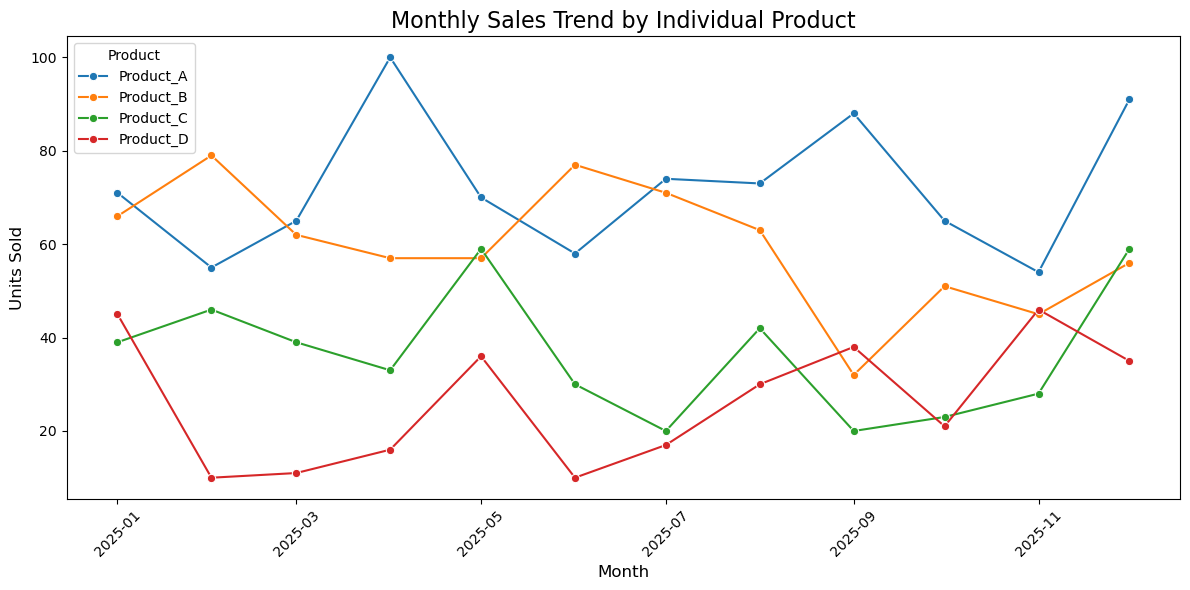

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
# prepare data for plotting individual product trends
# We need the product sales columns and the month
product_trends_df = df[['Month', 'Product_A', 'Product_B', 'Product_C', 'Product_D']]

# Melt the DataFrame to long format (required for easy plotting in Seaborn)
# We need 'Product' and 'Sales' columns
melted_df = product_trends_df.melt(
    id_vars=['Month'], 
    value_vars=products, 
    var_name='Product', 
    value_name='Sales'
)

plt.figure(figsize=(12, 6))

# Plot the trends using hue='Product' to separate the lines
sns.lineplot(x='Month', y='Sales', hue='Product', data=melted_df, marker='o')

plt.title('Monthly Sales Trend by Individual Product', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Units Sold', fontsize=12)
plt.legend(title='Product')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Stacked Bar Chart of Total Monthly Sales

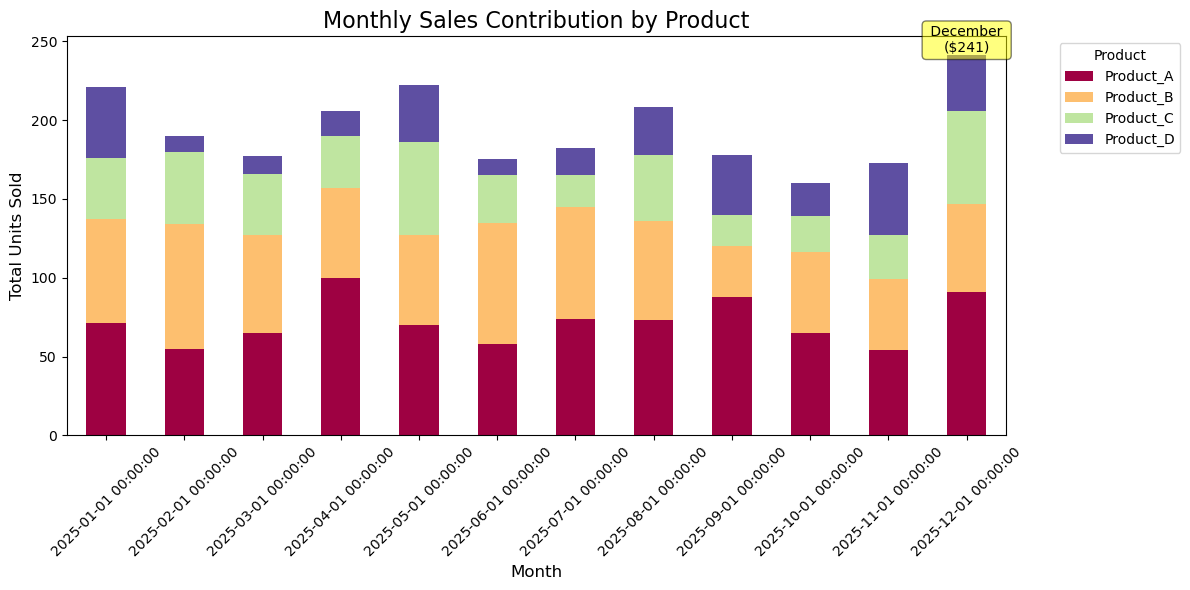

In [12]:
# create Stacked Bar Chart
pivot_data = df.set_index('Month')[products]
pivot_data.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Spectral')

plt.title('Monthly Sales Contribution by Product', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Units Sold', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')

# Annotate the best month (using the variable determined in Step 4)
# We need the index of that month
best_month_index = df[df['Month'] == best_month_row['Month']].index[0]
plt.text(
    x=best_month_index, 
    y=best_month_sales, 
    s=f" {best_month_name} \n(${best_month_sales:,.0f})", 
    ha='center', va='bottom', fontsize=10, color='black', 
    bbox=dict(facecolor='yellow', alpha=0.5, boxstyle='round,pad=0.3')
)

plt.tight_layout()
plt.show()

# Seaborn Heatmap: Monthly Sales of Each Product

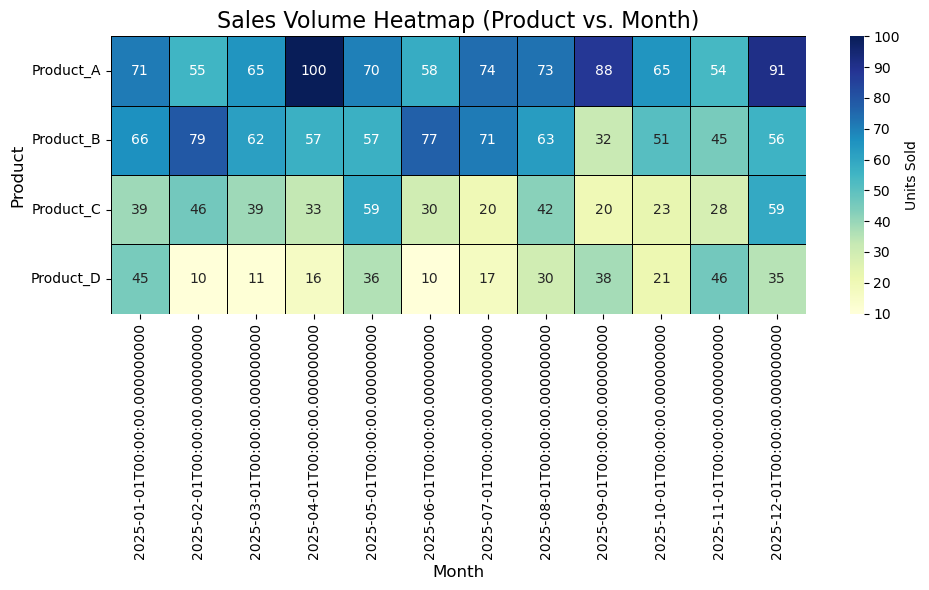

In [16]:
# prepare data for the Heatmap
heatmap_data = df[['Month'] + products].set_index('Month')

plt.figure(figsize=(10, 6))
sns.heatmap(
    heatmap_data.T, # Transpose (.T) so Products are rows and Months are columns
    annot=True, # Show the sales values on the map
    fmt='d', # Format the annotations as integers
    cmap='YlGnBu', 
    linewidths=0.5, 
    linecolor='black',
    cbar_kws={'label': 'Units Sold'}
)

plt.title('Sales Volume Heatmap (Product vs. Month)', fontsize=16)
plt.ylabel('Product', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# seaborn boxplot

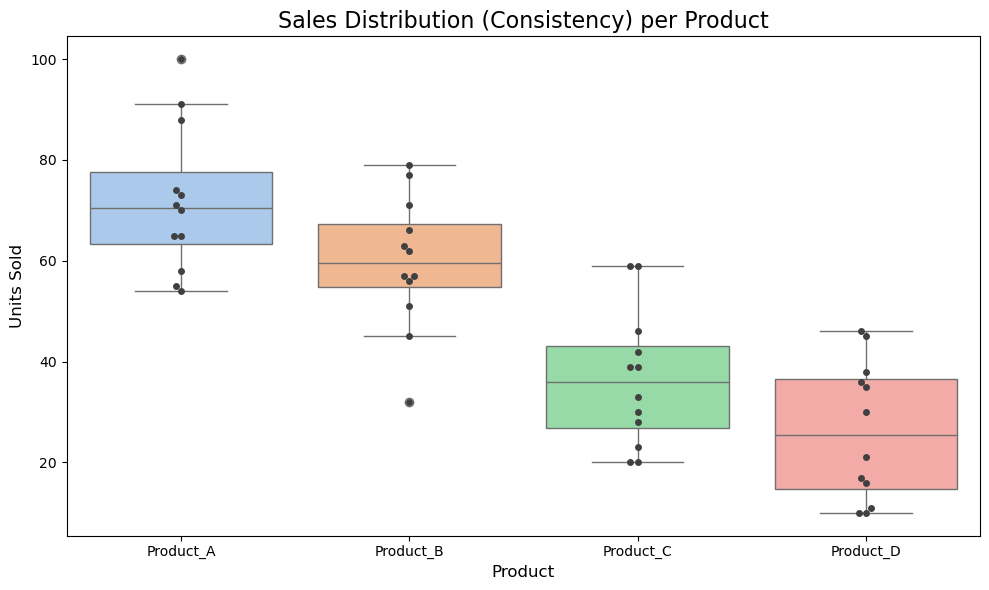


Insight from Boxplot:
The boxplot shows the median sales (line inside the box), the IQR (the box itself), and the range (whiskers).
Product with the highest median sales: Product_A


In [18]:
plt.figure(figsize=(10, 6))

# Boxplot
sns.boxplot(x='Product', y='Sales', data=melted_df, hue='Product', palette='pastel', dodge=False, legend=False)

# Swarmplot
sns.swarmplot(x='Product', y='Sales', data=melted_df, color='0.25') 

plt.title('Sales Distribution (Consistency) per Product', fontsize=16)
plt.xlabel('Product', fontsize=12)
plt.ylabel('Units Sold', fontsize=12)
plt.tight_layout()
plt.show()

# Insight
print("\nInsight from Boxplot:")
print("The boxplot shows the median sales (line inside the box), the IQR (the box itself), and the range (whiskers).")
print(f"Product with the highest median sales: {melted_df.groupby('Product')['Sales'].median().idxmax()}")
